# **5주차 - 1, 2** : 1차원 Ising 모형, Ensemble 평균


# Q1. Ising Model : single simulation

$N = 1000$개로 이루어진 1차원 이징 스핀 $x = {s_i}$의 에너지가 다음과 같이 주어진다.
> $\mathcal{H}(\{s_i\}) = - (J/2) \sum_{<ij>} s_is_j = -J \sum_{i} s_is_{i+1}$

여기서 $s_i \in \{-1, +1\}$이고 $i = 0, 1, \cdots, N-1$이며 $N = 0$인 주기 조건을 사용한다. 계의 온도는 $T = J$이다. (단, $k_B = 1$로 놓음)

**(a)** 초기에 $T = \infty$ 인 랜덤 배치에서 $T = J$의 평형 상태로 가는 것을 1회 모의 실험하고 $ene(t)$와 $mag(t)$를 시간 $t$에 대한 그래프로 나타내기.

1. 초기 N개의 스핀 상태를 랜덤하게 정한다. $s_i \in \{-1,+1\}$
2. 한 타임 : 임의의 i번째의 스핀을 변화시키는 것을 1000번 한 것
3. 스핀의 변화는 확률에 따라 변화 or 유지로 정해진다.
> $p = e^{[-2J(s_{i-1}+s_{k+1})s_k-2B_{s_k}]/k_BT}$
4. 총 에너지 : $ene(t) = H(x(t))$
5. $mag(t) = \frac{1}{N}\displaystyle\sum_{i}s_i $

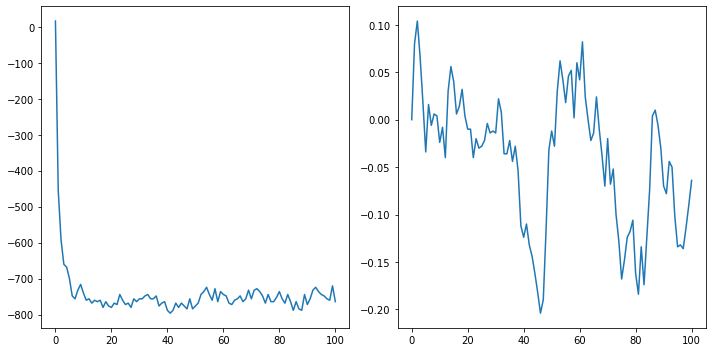

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 한 타임 돌 때의 스핀 변화
def ChangeSpin():
  for k in range(N):
    i = np.random.randint(0,N-1)   ### i번째의 스핀
    iplus1 = i+1
    if i == N-1:
      iplus1 = 0
    prob = np.exp((-2)*(s[i-1]+s[iplus1])*s[i]/Kb)
    if np.random.rand() < prob:
      s[i] *= (-1)
  return()

# ene, mag 계산
def EneMag():
  sssum = 0
  ssum = 0
  for i in range(N):
    ssum += s[i]
    if i == N-1:
      sssum += s[N-1]*s[0]
    else:
      sssum += s[i]*s[i+1]
  E = (-1) * J * sssum
  ene.append(E)
  M = ssum / N
  mag.append(M)
  return()

N = 1000
Kb = 1
T = 1   ### 임의로 지정한 온도
J = Kb*T
ene = []
mag = []
time = [t for t in range(101)]  ### 시간은 0 ~ 100

s = (np.random.randint(2,size=N))*2-1  ### 초기 스핀
for t in range(101):
  if t == 0:
    EneMag()
  else:
    ChangeSpin()
    EneMag()

fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].plot(time,ene)
axs[1].plot(time,mag)
plt.tight_layout()
plt.show()

*** 교수님 풀이 !**

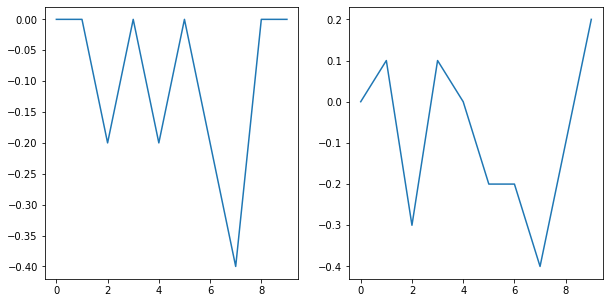

In [ ]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt

def pd_cond():
  for i in range(N-1): mp[i] = i+1;
  mp[N-1] = 0;

def ini_config():
  for i in range(N):
    if nr.rand() < 0.5: s[i] = 1
    else: s[i] = -1

def mea_ene():
  sm = np.roll(s,1)
  return(np.mean(-J*s*sm-B*s))

def proba():
  p={}
  for si in [-1,1]:
    for sj in [-1,1]:
      for sk in [-1,1]:
        p[(si,sj,sk)] = np.exp((-2*J*(si+sk)*sj - 2*B*sj)/temp)
  return(p)

def monte():
  for k in range(N):
    i = nr.randint(0,N)
    if (nr.rand() < pflip[(s[i-1],s[i],s[mp[i]])]) : s[i] = -s[i]


J=1; B=0; N=20; Tmax=10; temp=5
s = np.zeros(N,int)
mp = np.zeros(N,int)
ini_config()
ene = [mea_ene()]
mag = [np.mean(s)]
pflip = proba()
for t in range(1,Tmax):
  monte()
  ene.append(mea_ene())
  mag.append(np.mean(s))

fit, axs = plt.subplots(1,2,figsize=(10,5))
xt = np.linspace(0,Tmax-1,Tmax)
axs[0].plot(xt,ene)
axs[1].plot(xt,mag)
plt.show()

**(b)** (a)의 과정을 $R = 10$회 반복하여 $ene(t)$와 $|mag(t)|$의 앙상블 평균 $E(t)$와 $M(t)$를 시간 $t$에 대한 그래프로 나타내기

1. 초기 N개의 스핀 상태를 랜덤하게 정한다. $s_i \in \{-1,+1\}$
2. 한 타임 : 임의의 i번째의 스핀을 변화시키는 것을 1000번 한 것
3. 스핀의 변화는 확률에 따라 변화 or 유지로 정해진다.
> $p = e^{[-2J(s_{i-1}+s_{k+1})s_k-2B_{s_k}]/k_BT}$
4. 총 에너지 : $ene(t) = H(x(t))$
5. $mag(t) = \frac{1}{N}\displaystyle\sum_{i}s_i $
6. 위에 1 ~ 5번을 R회 반복 !
7. Ensemble average 앙상블 평균
> $E(t) = \frac{1}{R}\displaystyle\sum_{r=1}^{R}ene_r(t) $

  > $M(t) = \frac{1}{R}\displaystyle\sum_{r=1}^{R}|mag_r(t)| $



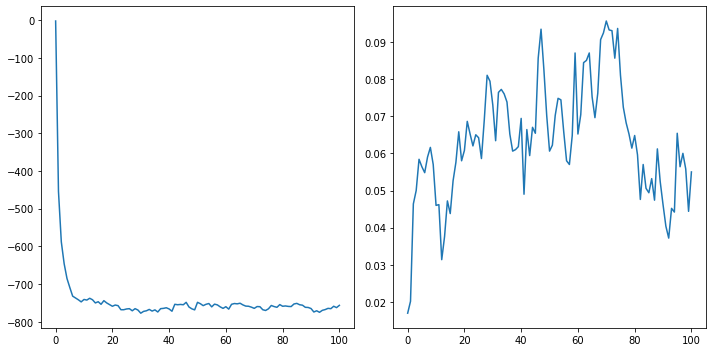

[[ 1  1  1 ... -1  1  1]
 [-1 -1 -1 ... -1 -1 -1]
 [ 1  1  1 ...  1  1  1]
 ...
 [-1 -1 -1 ...  1  1 -1]
 [-1  1  1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 초기 조건
N = 1000
Kb = 1
T = 1   ### 임의로 지정한 온도
J = Kb*T
time = [t for t in range(101)]  ### 시간은 0 ~ 100
s = np.array([((np.random.randint(2,size=N))*2-1) for r in range(10)])  ### 초기 스핀(r = 1 ~ 10)
s.reshape(10,N)

# 한 타임 돌 때의 스핀 변화
def ChangeSpin():
  for k in range(N):
    i = np.random.randint(0,N-1)   ### i번째의 스핀
    iplus1 = i+1
    if i == N-1:
      iplus1 = 0
    prob = np.exp((-2)*(s[r][i-1]+s[r][iplus1])*s[r][i]/Kb)
    if np.random.rand() < prob:
      s[r][i] *= (-1)
  return()

# ene, mag 계산
def EneMag():
  sssum = 0
  ssum = 0
  for i in range(N):
    ssum += s[r][i]
    if i == N-1:
      sssum += s[r][N-1]*s[r][0]
    else:
      sssum += s[r][i]*s[r][i+1]
  E = (-1) * J * sssum
  ene[r].append(E)
  M = ssum / N
  mag[r].append(M)
  return()


# 실행 R회
ene = [[] for r in range(10)]
mag = [[] for r in range(10)]
for t in range(101):
  for r in range(10):
    if t == 0:
      EneMag()
    else:
      ChangeSpin()
      EneMag()

# 시간별 실행한 R회의 평균
Emean_t = []
Mmean_t = []
for t in range(101):
  Esum = []
  Msum = []
  for r in range(10):
    Esum.append(ene[r][t])
    Msum.append(np.abs(mag[r][t]))
  Emean_t.append(np.mean(Esum))
  Mmean_t.append(np.mean(Msum))

# 그래프 그리기
fig, axs = plt.subplots(1,2,figsize=(10,5))
axs[0].plot(time,Emean_t)
axs[1].plot(time,Mmean_t)
plt.tight_layout()
plt.show()

print(s)

*** 교수님 풀이 !**

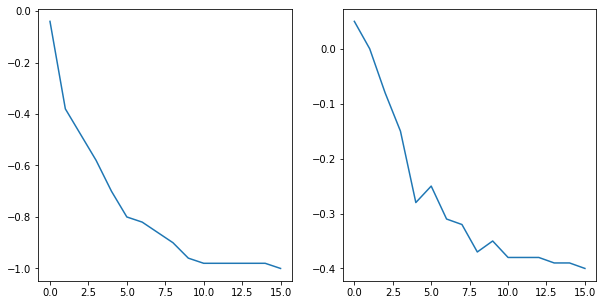

In [ ]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt

def pd_cond():
  for i in range(N-1): mp[i] = i+1;
  mp[N-1] = 0;

def ini_config():
  for i in range(N):
    if nr.rand() < 0.5: s[i] = 1
    else: s[i] = -1

def mea_ene():
  sm = np.roll(s,1)
  return(np.mean(-J*s*sm-B*s))

def proba():
  p={}
  for si in [-1,1]:
    for sj in [-1,1]:
      for sk in [-1,1]:
        p[(si,sj,sk)] = np.exp((-2*J*(si+sk)*sj - 2*B*sj)/temp)
  return(p)

def monte():
  for k in range(N):
    i = nr.randint(0,N)
    if (nr.rand() < pflip[(s[i-1],s[i],s[mp[i]])]) : s[i] = -s[i]


J=1; B=0; N=20; Tmax=16; temp=0.5; R=10
s = np.zeros(N,int)
mp = np.zeros(N,int)
pflip = proba()
# 실행 R번
ee, mm = [], []
for r in range(R):
  ini_config()
  ene = [mea_ene()]
  mag = [np.mean(s)]
  for t in range(1,Tmax):
    monte()
    ene.append(mea_ene())
    mag.append(np.mean(s))
  ee.append(ene)
  mm.append(mag)
ene_av = np.mean(ee, axis=0)
mag_av = np.mean(mm, axis=0)

fit, axs = plt.subplots(1,2,figsize=(10,5))
xt = np.linspace(0,Tmax-1,Tmax)
axs[0].plot(xt,ene_av)
axs[1].plot(xt,mag_av)
plt.show()

# *** *** N = 10000, R = 100, t = 300 해보기 ! *** ***

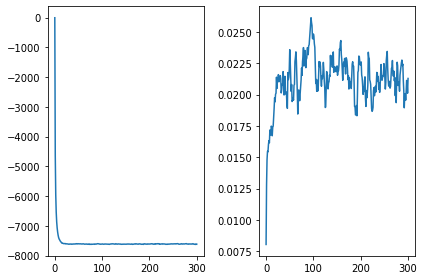

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 초기 조건
N = 10000
Kb = 1
T = 1   ### 임의로 지정한 온도
J = Kb*T
R = 100
time = [t for t in range(301)]  ### 시간은 0 ~ 300
s = np.array([((np.random.randint(2,size=N))*2-1) for r in range(R)])  ### 초기 스핀(r = 1 ~ 100)
s.reshape(R,N)

# 한 타임 돌 때의 스핀 변화
def ChangeSpin():
  for k in range(N):
    i = np.random.randint(0,N-1)   ### i번째의 스핀
    iplus1 = i+1
    if i == N-1:
      iplus1 = 0
    prob = np.exp((-2)*(s[r][i-1]+s[r][iplus1])*s[r][i]/Kb)
    if np.random.rand() < prob:
      s[r][i] *= (-1)
  return()

# ene, mag 계산
def EneMag():
  sssum = 0
  ssum = 0
  for i in range(N):
    ssum += s[r][i]
    if i == N-1:
      sssum += s[r][N-1]*s[r][0]
    else:
      sssum += s[r][i]*s[r][i+1]
  E = (-1) * J * sssum
  ene[r].append(E)
  M = ssum / N
  mag[r].append(M)
  return()


# 실행 R회
ene = [[] for r in range(R)]
mag = [[] for r in range(R)]
for t in range(301):
  for r in range(R):
    if t == 0:
      EneMag()
    else:
      ChangeSpin()
      EneMag()

# 시간별 실행한 R회의 평균
Emean_t = []
Mmean_t = []
for t in range(301):
  Esum = []
  Msum = []
  for r in range(R):
    Esum.append(ene[r][t])
    Msum.append(np.abs(mag[r][t]))
  Emean_t.append(np.mean(Esum))
  Mmean_t.append(np.mean(Msum))

# 그래프 그리기
fig, axs = plt.subplots(1,2)
axs[0].plot(time,Emean_t)
axs[1].plot(time,Mmean_t)
plt.tight_layout()
plt.show()

*** 자기장이 있을 때,**
온도를 바꿔가며 그래프 그려보기 !

 < B = 10, temp = 0.1 >


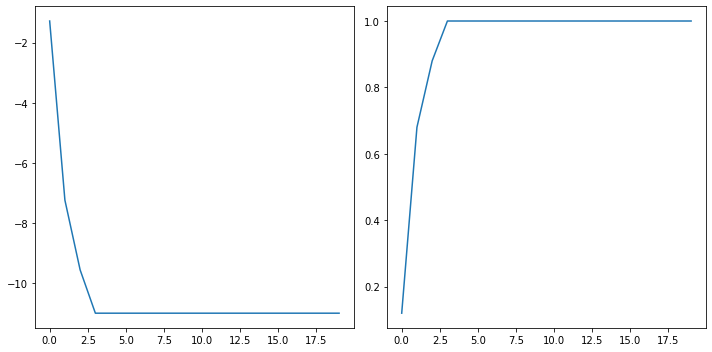


 < B = 10, temp = 1 >


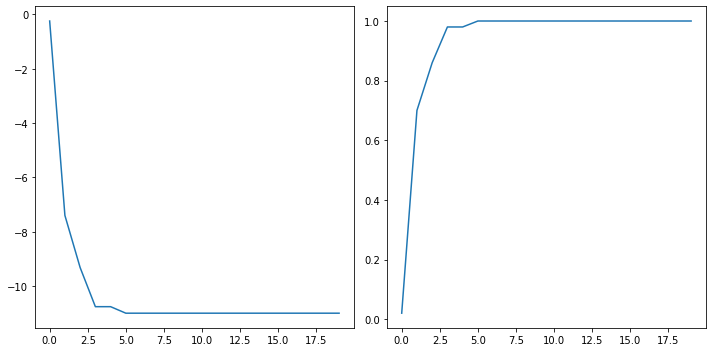


 < B = 10, temp = 5 >


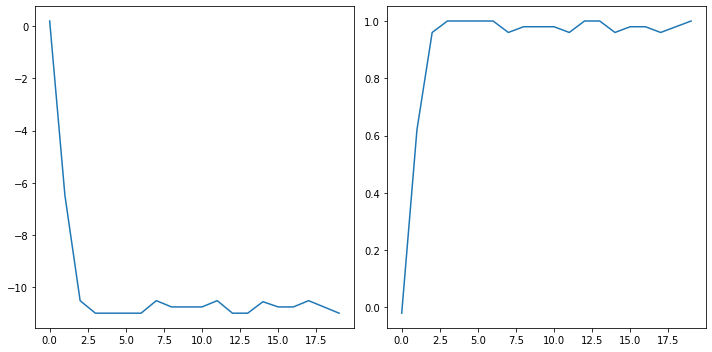


 < B = 10, temp = 10 >


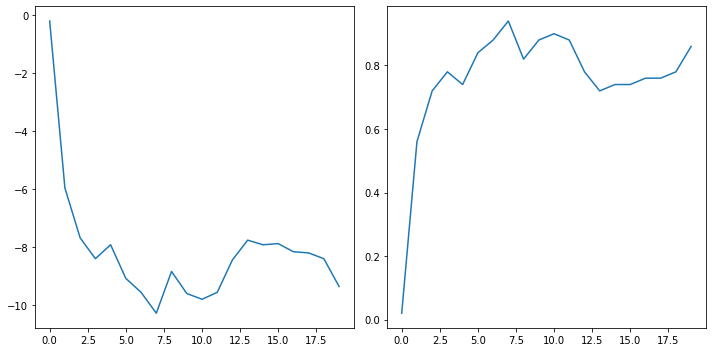



 => 같은 자기장에서, 온도만 바꾸었을 때 온도가 커질수록 수렴하기까지 오랜 시간이 걸린다 !



In [ ]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt

def pd_cond():
  for i in range(N-1): mp[i] = i+1;
  mp[N-1] = 0;

def ini_config():
  for i in range(N):
    if nr.rand() < 0.5: s[i] = 1
    else: s[i] = -1

def mea_ene():
  sm = np.roll(s,1)
  return(np.mean(-J*s*sm-B*s))

def proba():
  p={}
  for si in [-1,1]:
    for sj in [-1,1]:
      for sk in [-1,1]:
        p[(si,sj,sk)] = np.exp((-2*J*(si+sk)*sj - 2*B*sj)/temp)
  return(p)

def monte():
  for k in range(N):
    i = nr.randint(0,N)
    if (nr.rand() < pflip[(s[i-1],s[i],s[mp[i]])]) : s[i] = -s[i]


J=1; B=10; N=10; Tmax=20; temp=0.1; R=10
s = np.zeros(N,int)
mp = np.zeros(N,int)
pflip = proba()
# 실행 R번
ee, mm = [], []
for r in range(R):
  ini_config()
  ene = [mea_ene()]
  mag = [np.mean(s)]
  for t in range(1,Tmax):
    monte()
    ene.append(mea_ene())
    mag.append(np.mean(s))
  ee.append(ene)
  mm.append(mag)
ene_av = np.mean(ee, axis=0)
mag_av = np.mean(mm, axis=0)

print('\033[1m','< B = 10, temp = 0.1 >')
fig, axs = plt.subplots(1,2, figsize=(10,5))
xt = np.linspace(0,Tmax-1,Tmax)
axs[0].plot(xt,ene_av)
axs[1].plot(xt,mag_av)
plt.tight_layout()
plt.show()

J=1; B=10; N=10; Tmax=20; temp=1; R=10
s = np.zeros(N,int)
mp = np.zeros(N,int)
pflip = proba()
# 실행 R번
ee, mm = [], []
for r in range(R):
  ini_config()
  ene = [mea_ene()]
  mag = [np.mean(s)]
  for t in range(1,Tmax):
    monte()
    ene.append(mea_ene())
    mag.append(np.mean(s))
  ee.append(ene)
  mm.append(mag)
ene_av = np.mean(ee, axis=0)
mag_av = np.mean(mm, axis=0)

print('')
print('\033[1m','< B = 10, temp = 1 >')
fig, axs = plt.subplots(1,2, figsize=(10,5))
xt = np.linspace(0,Tmax-1,Tmax)
axs[0].plot(xt,ene_av)
axs[1].plot(xt,mag_av)
plt.tight_layout()
plt.show()

J=1; B=10; N=10; Tmax=20; temp=5; R=10
s = np.zeros(N,int)
mp = np.zeros(N,int)
pflip = proba()
# 실행 R번
ee, mm = [], []
for r in range(R):
  ini_config()
  ene = [mea_ene()]
  mag = [np.mean(s)]
  for t in range(1,Tmax):
    monte()
    ene.append(mea_ene())
    mag.append(np.mean(s))
  ee.append(ene)
  mm.append(mag)
ene_av = np.mean(ee, axis=0)
mag_av = np.mean(mm, axis=0)

print('')
print('\033[1m','< B = 10, temp = 5 >')
fig, axs = plt.subplots(1,2, figsize=(10,5))
xt = np.linspace(0,Tmax-1,Tmax)
axs[0].plot(xt,ene_av)
axs[1].plot(xt,mag_av)
plt.tight_layout()
plt.show()

J=1; B=10; N=10; Tmax=20; temp=10; R=10
s = np.zeros(N,int)
mp = np.zeros(N,int)
pflip = proba()
# 실행 R번
ee, mm = [], []
for r in range(R):
  ini_config()
  ene = [mea_ene()]
  mag = [np.mean(s)]
  for t in range(1,Tmax):
    monte()
    ene.append(mea_ene())
    mag.append(np.mean(s))
  ee.append(ene)
  mm.append(mag)
ene_av = np.mean(ee, axis=0)
mag_av = np.mean(mm, axis=0)

print('')
print('\033[1m','< B = 10, temp = 10 >')
fig, axs = plt.subplots(1,2, figsize=(10,5))
xt = np.linspace(0,Tmax-1,Tmax)
axs[0].plot(xt,ene_av)
axs[1].plot(xt,mag_av)
plt.tight_layout()
plt.show()

print('')
print('')
print('\033[1m','=> 같은 자기장에서, 온도만 바꾸었을 때 온도가 커질수록 수렴하기까지 오랜 시간이 걸린다 !')
print('\033[0m')